<a href="https://colab.research.google.com/github/AniRony/Traffic_Signal_Classification/blob/main/Traffic_Signal_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting G Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Importing Packages

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, load_model, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
import random

# Labels

In [23]:
classes = { 1:'Speed limit (20km/h)',
           2:'Speed limit (30km/h)',
           3:'Speed limit (50km/h)', 
           4:'Speed limit (60km/h)', 
           5:'Speed limit (70km/h)', 
           6:'Speed limit (80km/h)', 
           7:'End of speed limit (80km/h)', 
           8:'Speed limit (100km/h)', 
           9:'Speed limit (120km/h)', 
           10:'No passing', 
           11:'No passing veh over 3.5 tons', 
           12:'Right-of-way at intersection', 
           13:'Priority road', 
           14:'Yield', 
           15:'Stop', 
           16:'No vehicles', 
           17:'Veh > 3.5 tons prohibited', 
           18:'No entry', 
           19:'General caution', 
           20:'Dangerous curve left', 
           21:'Dangerous curve right', 
           22:'Double curve', 
           23:'Bumpy road', 
           24:'Slippery road', 
           25:'Road narrows on the right', 
           26:'Road work', 
           27:'Traffic signals', 
           28:'Pedestrians', 
           29:'Children crossing', 
           30:'Bicycles crossing', 
           31:'Beware of ice/snow',
           32:'Wild animals crossing', 
           33:'End speed + passing limits', 
           34:'Turn right ahead', 
           35:'Turn left ahead', 
           36:'Ahead only', 
           37:'Go straight or right', 
           38:'Go straight or left', 
           39:'Keep right', 
           40:'Keep left', 
           41:'Roundabout mandatory', 
           42:'End of no passing', 
           43:'End no passing veh > 3.5 tons' }

In [24]:
classes

{1: 'Speed limit (20km/h)',
 2: 'Speed limit (30km/h)',
 3: 'Speed limit (50km/h)',
 4: 'Speed limit (60km/h)',
 5: 'Speed limit (70km/h)',
 6: 'Speed limit (80km/h)',
 7: 'End of speed limit (80km/h)',
 8: 'Speed limit (100km/h)',
 9: 'Speed limit (120km/h)',
 10: 'No passing',
 11: 'No passing veh over 3.5 tons',
 12: 'Right-of-way at intersection',
 13: 'Priority road',
 14: 'Yield',
 15: 'Stop',
 16: 'No vehicles',
 17: 'Veh > 3.5 tons prohibited',
 18: 'No entry',
 19: 'General caution',
 20: 'Dangerous curve left',
 21: 'Dangerous curve right',
 22: 'Double curve',
 23: 'Bumpy road',
 24: 'Slippery road',
 25: 'Road narrows on the right',
 26: 'Road work',
 27: 'Traffic signals',
 28: 'Pedestrians',
 29: 'Children crossing',
 30: 'Bicycles crossing',
 31: 'Beware of ice/snow',
 32: 'Wild animals crossing',
 33: 'End speed + passing limits',
 34: 'Turn right ahead',
 35: 'Turn left ahead',
 36: 'Ahead only',
 37: 'Go straight or right',
 38: 'Go straight or left',
 39: 'Keep right

# Importing all Data and Labels accordingly For CNN with input(30,30,3)

In [5]:
data = []
labels = []
classes = 43
#cur_path = os.getcwd()
cur_path = '/content/gdrive/MyDrive/DEEP LEARNING/Traffic Signal Classification/Traffic_Signal'
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


# Train and Test Splitting

In [6]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

(31367, 30, 30, 3) (31367, 43)
(7842, 30, 30, 3) (7842, 43)


# Plotting some Figures

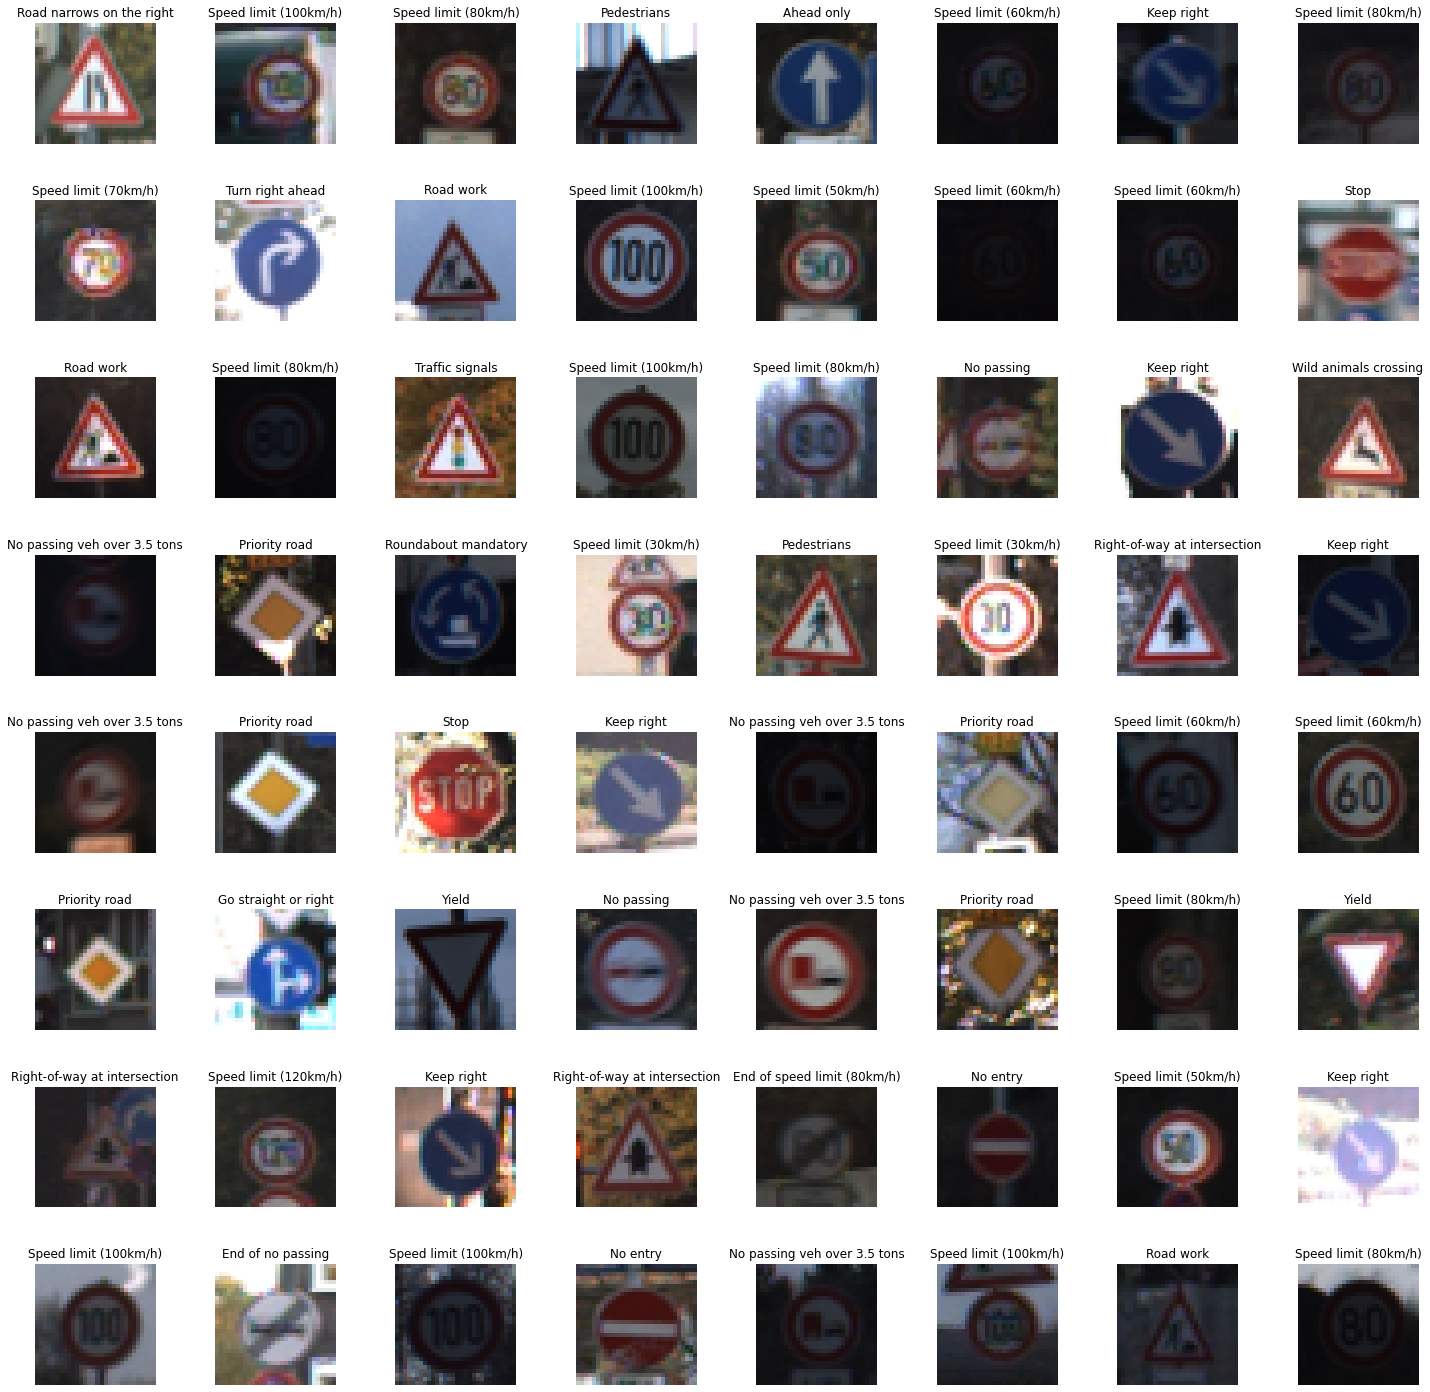

In [28]:
plt.figure(figsize=(20,20))
import random
for i in range(64):
    n = random.randint(0,30000)
    plt.subplot(8,8,i+1)
    plt.imshow(X_train[n])
    plt.axis('off')
    plt.title(classes[np.argmax(y_train[n])+1])
plt.tight_layout(h_pad=0.0)
plt.show()

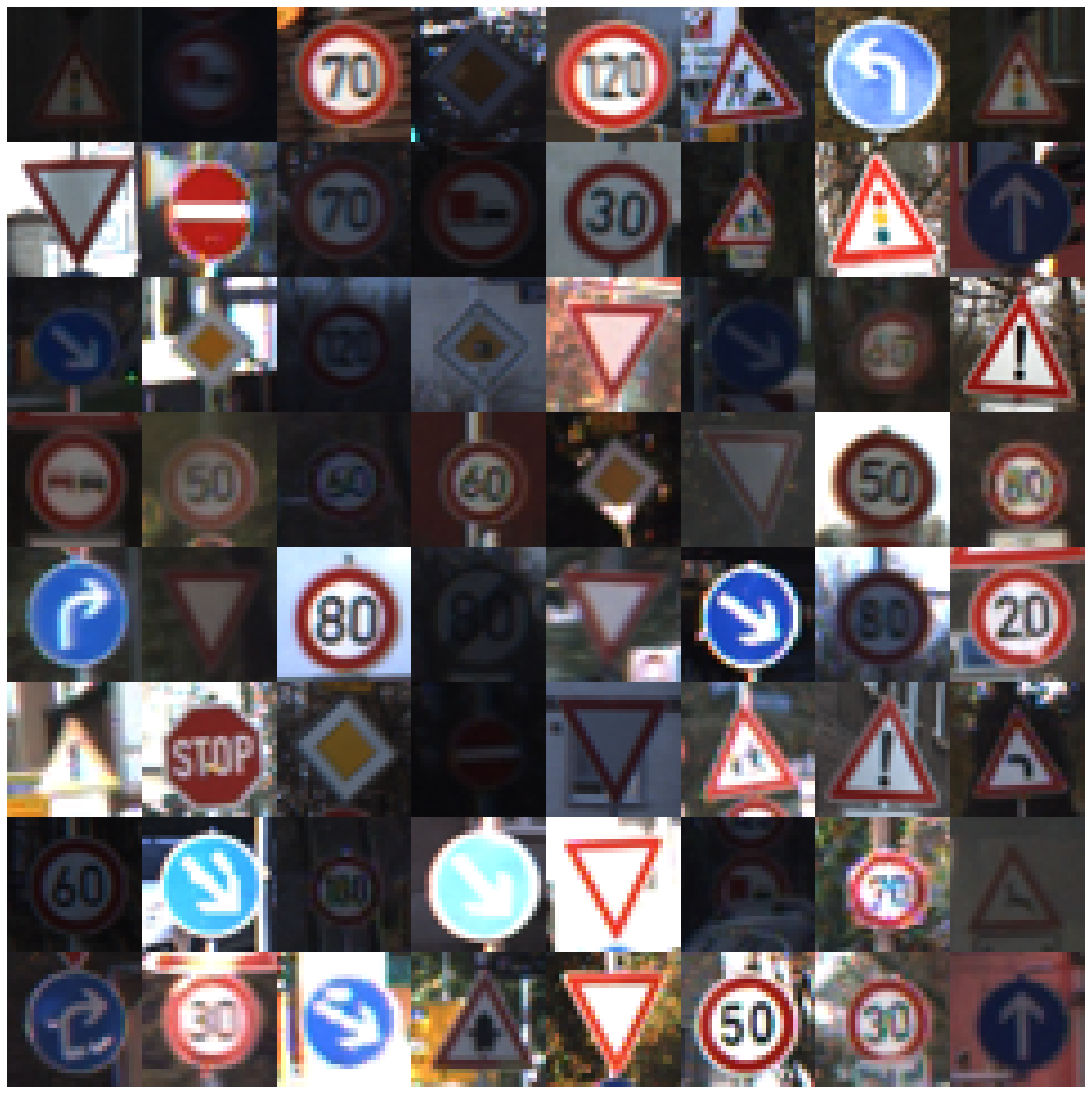

In [30]:
plt.figure(figsize=(15,15))
import random
for i in range(64):
    n = random.randint(0,30000)
    plt.subplot(8,8,i+1)
    plt.imshow(X_train[n])
    plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# CNN Model
- Training Accuracy = 94
- Testing Accuracy  = 98

In [6]:
tf.random.set_seed(100)
tf.keras.backend.clear_session()
model_CNN = None

model_CNN = Sequential()
model_CNN.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model_CNN.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model_CNN.add(MaxPool2D(pool_size=(2, 2)))
model_CNN.add(Dropout(rate=0.25))
model_CNN.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_CNN.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_CNN.add(MaxPool2D(pool_size=(2, 2)))
model_CNN.add(Dropout(rate=0.25))
model_CNN.add(Flatten())
model_CNN.add(Dense(256, activation='relu'))
model_CNN.add(Dropout(rate=0.5))
model_CNN.add(Dense(43, activation='softmax'))
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [7]:
model_CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model_CNN.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
981/981 [==============================] - 18s 5ms/step - loss: 3.1188 - accuracy: 0.1833 - val_loss: 1.1601 - val_accuracy: 0.6860
Epoch 2/10
981/981 [==============================] - 4s 4ms/step - loss: 0.9207 - accuracy: 0.7349 - val_loss: 0.2242 - val_accuracy: 0.9410
Epoch 3/10
981/981 [==============================] - 4s 4ms/step - loss: 0.4438 - accuracy: 0.8717 - val_loss: 0.1788 - val_accuracy: 0.9538
Epoch 4/10
981/981 [==============================] - 4s 4ms/step - loss: 0.3386 - accuracy: 0.9053 - val_loss: 0.1204 - val_accuracy: 0.9654
Epoch 5/10
981/981 [==============================] - 4s 4ms/step - loss: 0.2827 - accuracy: 0.9216 - val_loss: 0.1559 - val_accuracy: 0.9547
Epoch 6/10
981/981 [==============================] - 4s 4ms/step - loss: 0.2555 - accuracy: 0.9295 - val_loss: 0.0611 - val_accuracy: 0.9847
Epoch 7/10
981/981 [==============================] - 4s 4ms/step - loss: 0.2451 - accuracy: 0.9342 - val_loss: 0.0825 - val_accuracy: 0.9782
Epoch

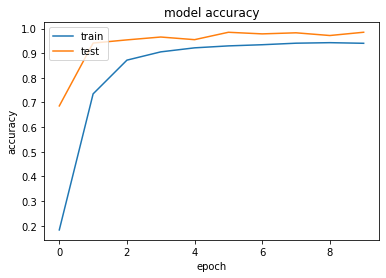

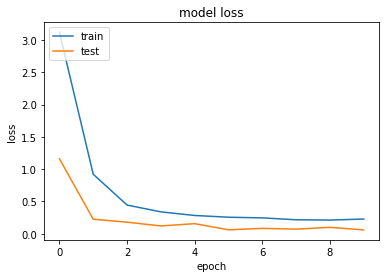

In [9]:
# summarize training for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
model_CNN.save('/content/gdrive/MyDrive/DEEP LEARNING/Traffic Signal Classification/CNN_Signal_Classification.h5')

In [3]:
model_CNN = load_model('/content/gdrive/MyDrive/DEEP LEARNING/Traffic Signal Classification/CNN_Signal_Classification.h5')

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/DEEP LEARNING/Traffic Signal Classification/Traffic_Signal/Test.csv')

# Real Test Images Loading and Calculating the accuracy of the Model

In [5]:
df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [36]:
data = []
labels = []
#cur_path = os.getcwd()
cur_path = '/content/gdrive/MyDrive/DEEP LEARNING/Traffic Signal Classification/Traffic_Signal'
#Retrieving the images and their labels 
for i in range(64):# can make this len(df) instead of 64 to get the full accuracy result on 12000+ images
  n = random.randint(0,len(df))
  try:
    image = Image.open(cur_path + '/'+ df.Path[n])
    image = image.resize((30,30))
    image = np.array(image)
    data.append(image)
    labels.append(df.ClassId[n])
  except:
    print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(64, 30, 30, 3) (64,)


In [37]:
Y_test = to_categorical(labels, 43)
print(data.shape, Y_test.shape)

(64, 30, 30, 3) (64, 43)


In [38]:
model_CNN.evaluate(data,Y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.6021 - accuracy: 0.9219


[0.6021087169647217, 0.921875]

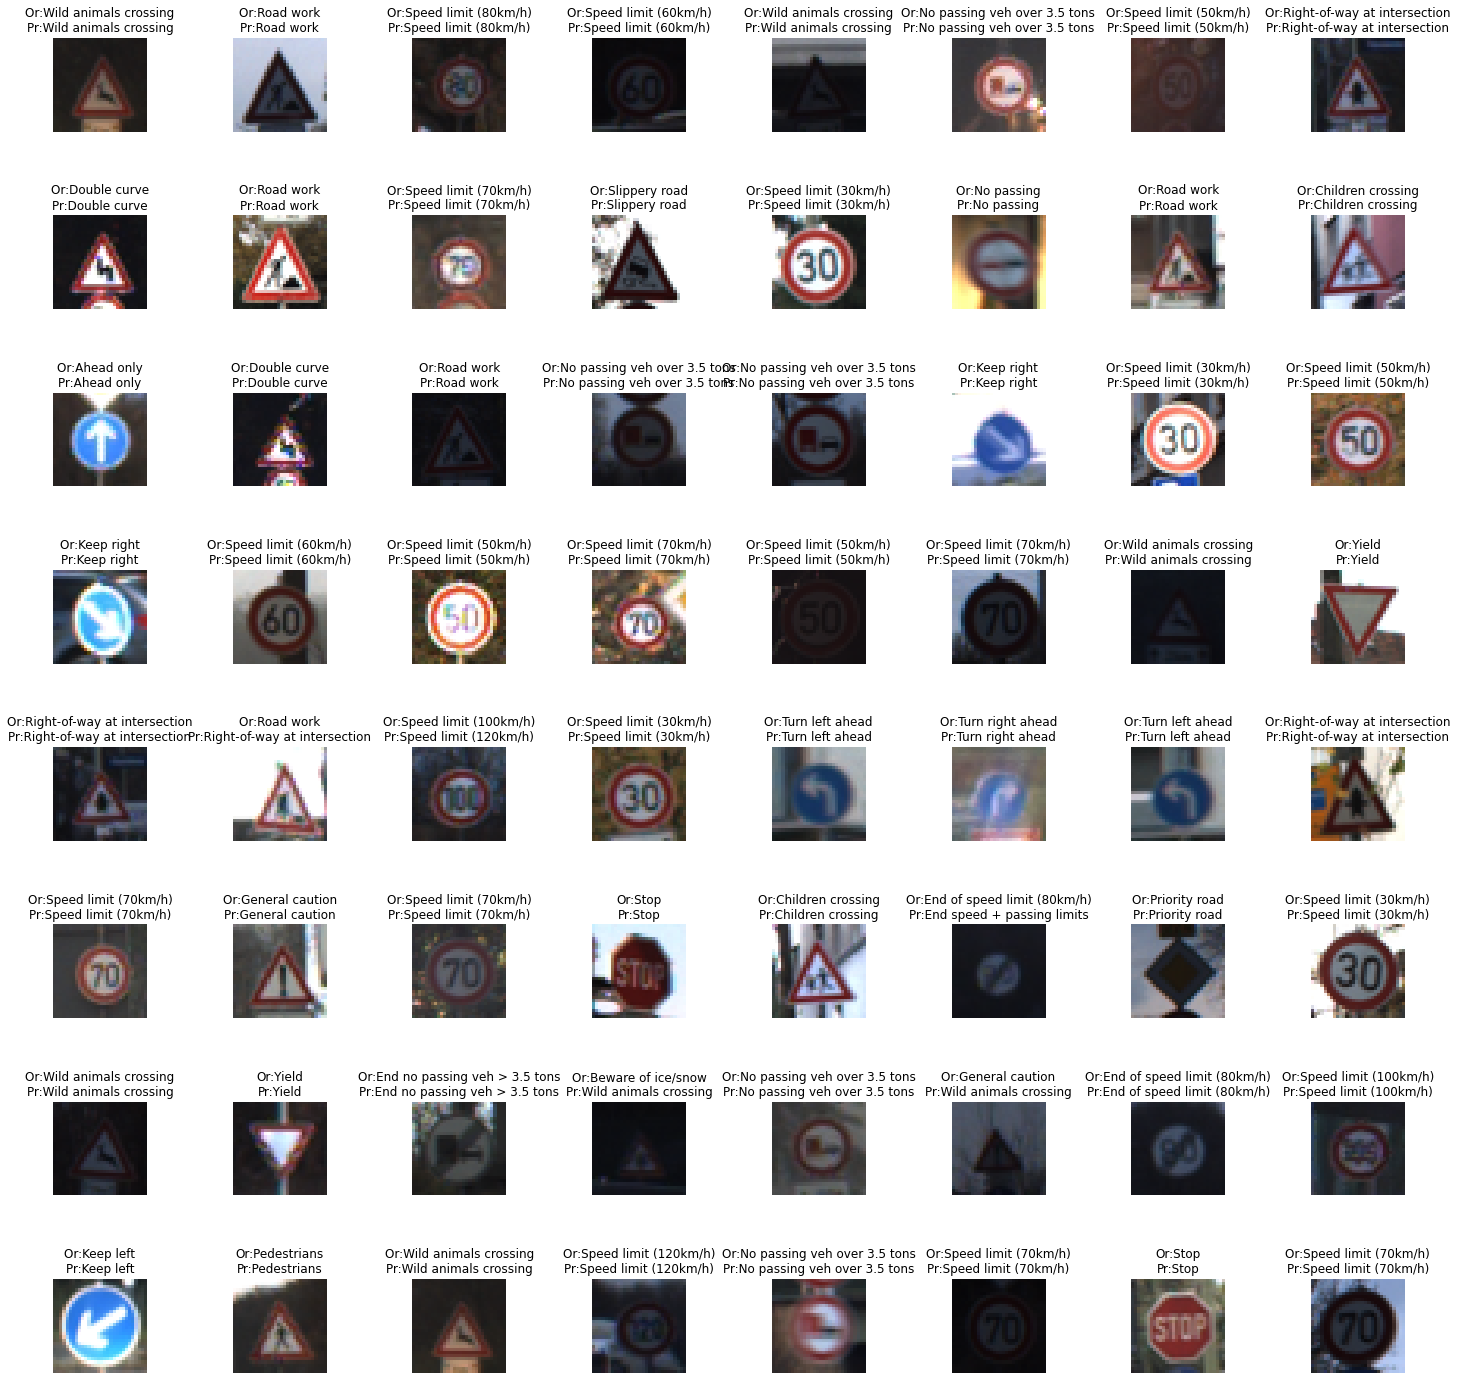

In [39]:
plt.figure(figsize=(20,20))
import random
for i in range(64):
  pred = model_CNN.predict(data[i].reshape(1,30,30,3))
  #print(pred)
  plt.subplot(8,8,i+1)
  plt.imshow(data[i])
  plt.axis('off')
  plt.title(f'Or:{classes[np.argmax(Y_test[i])+1]}\nPr:{classes[np.argmax(pred)+1]}')
plt.tight_layout(h_pad=0.0)
plt.show()

# Dataset for VGG16 and VGG19 Input(224,224,3)

In [3]:
data = []
labels = []
classes = 43
#cur_path = os.getcwd()
cur_path = '/content/gdrive/MyDrive/DEEP LEARNING/Traffic Signal Classification/Traffic_Signal'
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((224,224))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 224, 224, 3) (39209,)


In [4]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

(31367, 224, 224, 3) (31367, 43)
(7842, 224, 224, 3) (7842, 43)


# VGG 16 Pre Trained Model
- Training Accuracy = 94
- Testing Accuracy  = 98

In [13]:
tf.keras.backend.clear_session()
model_vgg16_trained = None
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

vgg16.trainable = False
model_vgg16_trained = Sequential()
model_vgg16_trained.add(vgg16)
model_vgg16_trained.add(Flatten())

model_vgg16_trained.add(Dense(128, activation='relu'))
model_vgg16_trained.add(Dropout(0.5))

model_vgg16_trained.add(Dense(43, activation='softmax'))
# model summary
model_vgg16_trained.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 43)                5547      
                                                                 
Total params: 17,931,627
Trainable params: 3,216,939
Non-trainable params: 14,714,688
_____________________________________

In [14]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_vgg16_trained.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model_vgg16_trained.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
981/981 [==============================] - 196s 196ms/step - loss: 2.3158 - accuracy: 0.4239 - val_loss: 0.6391 - val_accuracy: 0.8258
Epoch 2/10
981/981 [==============================] - 189s 193ms/step - loss: 0.9312 - accuracy: 0.7290 - val_loss: 0.2598 - val_accuracy: 0.9260
Epoch 3/10
981/981 [==============================] - 189s 193ms/step - loss: 0.5614 - accuracy: 0.8299 - val_loss: 0.1462 - val_accuracy: 0.9629
Epoch 4/10
981/981 [==============================] - 189s 192ms/step - loss: 0.4042 - accuracy: 0.8737 - val_loss: 0.0976 - val_accuracy: 0.9736
Epoch 5/10
981/981 [==============================] - 189s 193ms/step - loss: 0.3320 - accuracy: 0.8984 - val_loss: 0.1108 - val_accuracy: 0.9707
Epoch 6/10
981/981 [==============================] - 189s 193ms/step - loss: 0.2835 - accuracy: 0.9114 - val_loss: 0.0803 - val_accuracy: 0.9772
Epoch 7/10
981/981 [==============================] - 189s 193ms/step - loss: 0.2362 - accuracy: 0.9277 - val_loss: 0.0514 -

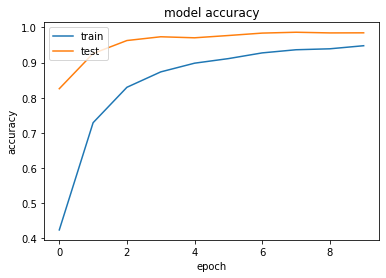

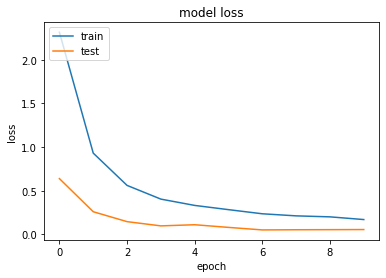

In [16]:
# summarize training for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
model_vgg16_trained.save('/content/gdrive/MyDrive/DEEP LEARNING/Traffic Signal Classification/VGG16_Signal_Classification.h5')

In [ ]:
model_vgg16_trained = load_model('/content/gdrive/MyDrive/DEEP LEARNING/Traffic Signal Classification/VGG16_Signal_Classification.h5')

# VGG 19 Pre Trained Model
- Training Accuracy = 94
- Testing Accuracy  = 98

In [5]:
tf.keras.backend.clear_session()
model_vgg19_trained = None
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(224,224,3))
# mark loaded layers as not trainable
vgg19.trainable=False
model_vgg19_trained = Sequential()
model_vgg19_trained.add(vgg19)
model_vgg19_trained.add(Flatten())

model_vgg19_trained.add(Dense(128, activation='relu'))
model_vgg19_trained.add(Dropout(0.5))

model_vgg19_trained.add(Dense(43, activation='softmax'))
# model summary
model_vgg19_trained.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 43)                5547      
                                                                 
Total params: 23,241,323
Trainable params: 3,216,939
Non-trainable params: 20,024,384
_________________________________________________________________


In [7]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_vgg19_trained.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model_vgg19_trained.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
981/981 [==============================] - 229s 220ms/step - loss: 2.2850 - accuracy: 0.4466 - val_loss: 0.6228 - val_accuracy: 0.8352
Epoch 2/10
981/981 [==============================] - 223s 228ms/step - loss: 0.9120 - accuracy: 0.7295 - val_loss: 0.2476 - val_accuracy: 0.9322
Epoch 3/10
981/981 [==============================] - 224s 228ms/step - loss: 0.5674 - accuracy: 0.8263 - val_loss: 0.1595 - val_accuracy: 0.9560
Epoch 4/10
981/981 [==============================] - 224s 228ms/step - loss: 0.4265 - accuracy: 0.8678 - val_loss: 0.1128 - val_accuracy: 0.9672
Epoch 5/10
981/981 [==============================] - 224s 228ms/step - loss: 0.3371 - accuracy: 0.8955 - val_loss: 0.0871 - val_accuracy: 0.9717
Epoch 6/10
981/981 [==============================] - 224s 228ms/step - loss: 0.2870 - accuracy: 0.9095 - val_loss: 0.0736 - val_accuracy: 0.9777
Epoch 7/10
981/981 [==============================] - 224s 228ms/step - loss: 0.2508 - accuracy: 0.9207 - val_loss: 0.0598 -

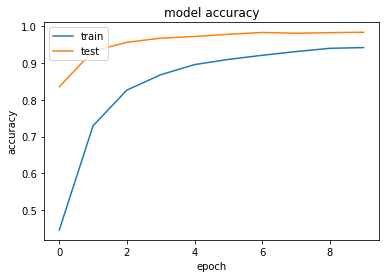

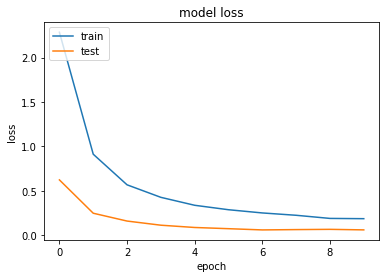

In [9]:
# summarize training for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
model_vgg19_trained.save('/content/gdrive/MyDrive/DEEP LEARNING/Traffic Signal Classification/VGG19_Signal_Classification.h5')

In [ ]:
model_vgg19_trained = load_model('/content/gdrive/MyDrive/DEEP LEARNING/Traffic Signal Classification/VGG19_Signal_Classification.h5')